### STEP1- Import data and required packages

Import libraries

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import CSV file of dataset

In [20]:
df = pd.read_csv("data\stud.csv")

Read top 5 records in dataset

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [22]:
df.shape

(1000, 8)

### STEP 2- Data Analysis

Check missing value

In [23]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing value in given dataset

Check duplicates

In [24]:
df.duplicated().sum()

0

There is no duplicates

Check data types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check no. of unique values in each column

In [26]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check statistics of data

In [27]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight -
1. From above description of numerical data, all means are very close to each other - between 66 and 68.05;
2. All standard deviations are also close - between 14.6 and 15.19;
3. While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

Exploring Data

In [28]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [29]:
#Define numerical & categorical features
numerical_features = [f for f in df.columns if df[f].dtype != 'O']
categorical_features = [f for f in df.columns if df[f].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for total score and average

In [30]:
#create new column name total

df['total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Avg'] = df['total']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,Avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [33]:
reading_full = df[df['reading_score'] == 100]['Avg'].count()
writing_full = df[df['writing_score'] == 100]['Avg'].count()
math_full = df[df['math_score'] == 100]['Avg'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [35]:
reading_less_20 = df[df['reading_score'] <= 20]['Avg'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Avg'].count()
math_less_20 = df[df['math_score'] <= 20]['Avg'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


-Insights
1. From above values we get students have performed the worst in Maths
2. Best performance is in reading section

### STEP 3 - DATA Visualization

Histogram & KDE

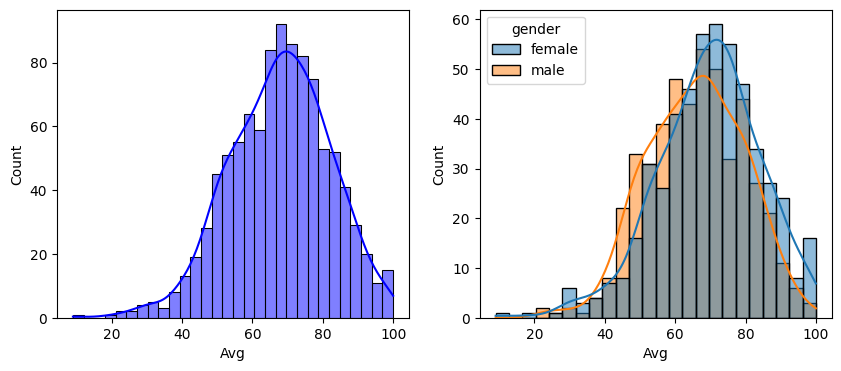

In [41]:
fig, axs = plt.subplots(1,2,figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'Avg', bins = 30, kde = True, color = 'blue')
plt.subplot(1,2,2)
sns.histplot(data = df, x= 'Avg', kde= True, hue = 'gender')
plt.show()

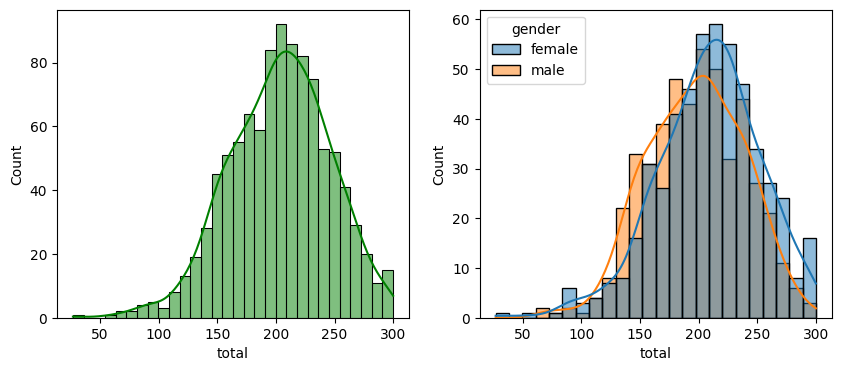

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
sns.histplot(data=df,x='total',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total',kde=True,hue='gender')
plt.show()

Insights -
1. Female students tend to perform well then male students.

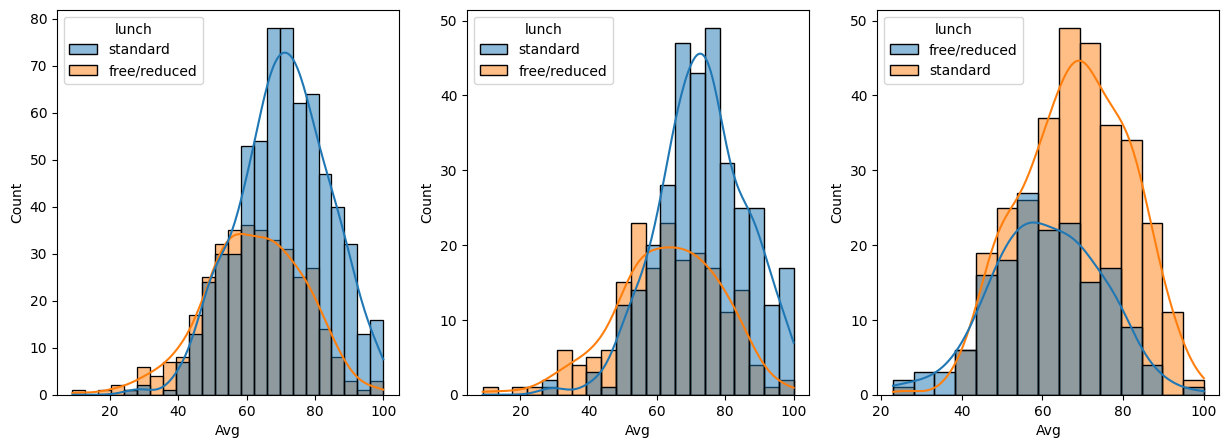

In [43]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.histplot(data=df,x='Avg',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Avg',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Avg',kde=True,hue='lunch')
plt.show()

Insights -
1. Standard lunch helps perform well in exams.
2. Standard lunch helps perform well in exams be it a male or a female.

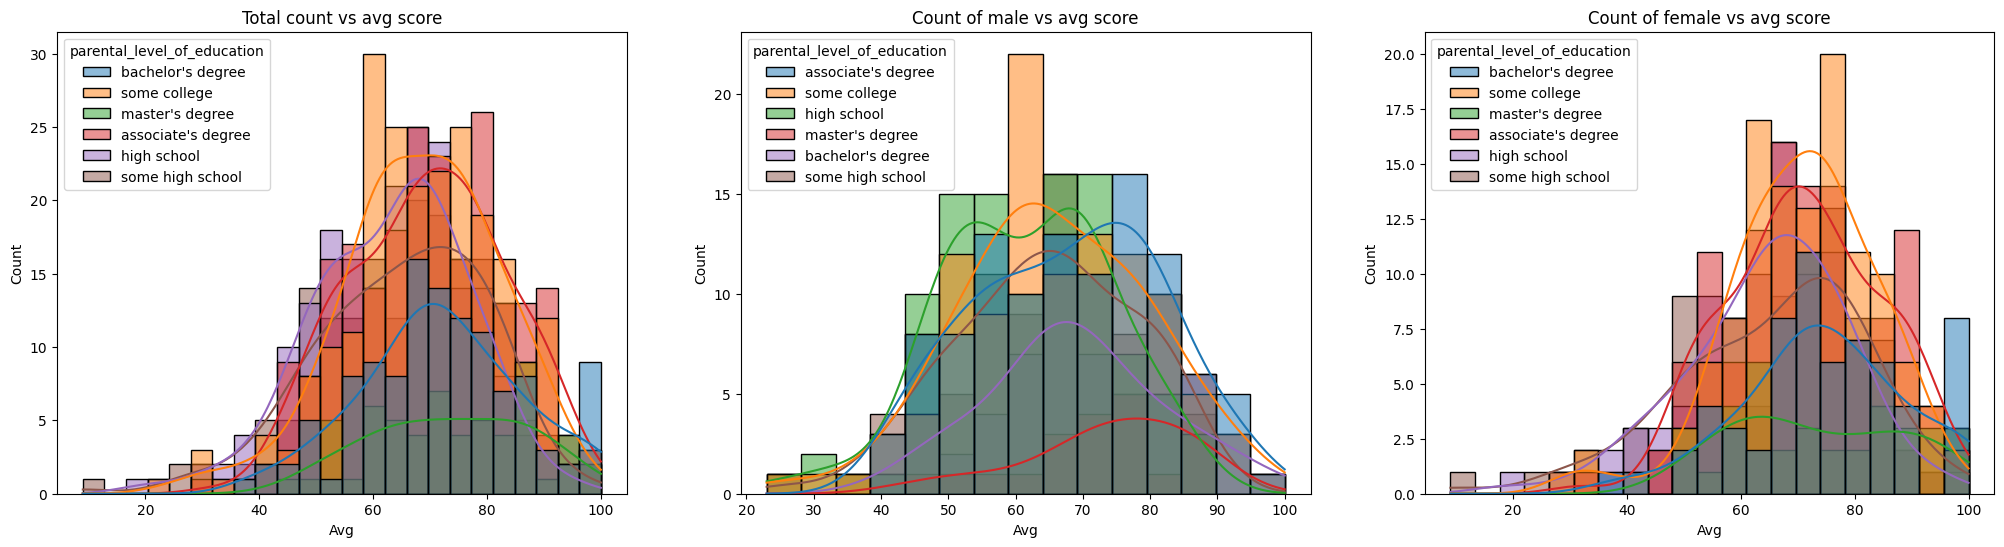

In [52]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Avg',kde=True,hue='parental_level_of_education')
plt.title('Total count vs avg score')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='Avg',kde=True,hue='parental_level_of_education')
plt.title('Count of male vs avg score')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Avg',kde=True,hue='parental_level_of_education')
plt.title('Count of female vs avg score')
plt.show()

Insights -
1. In general parent's education don't help student perform well in exam.
2. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3. 3rd plot we can see there is no effect of parent's education on female students.

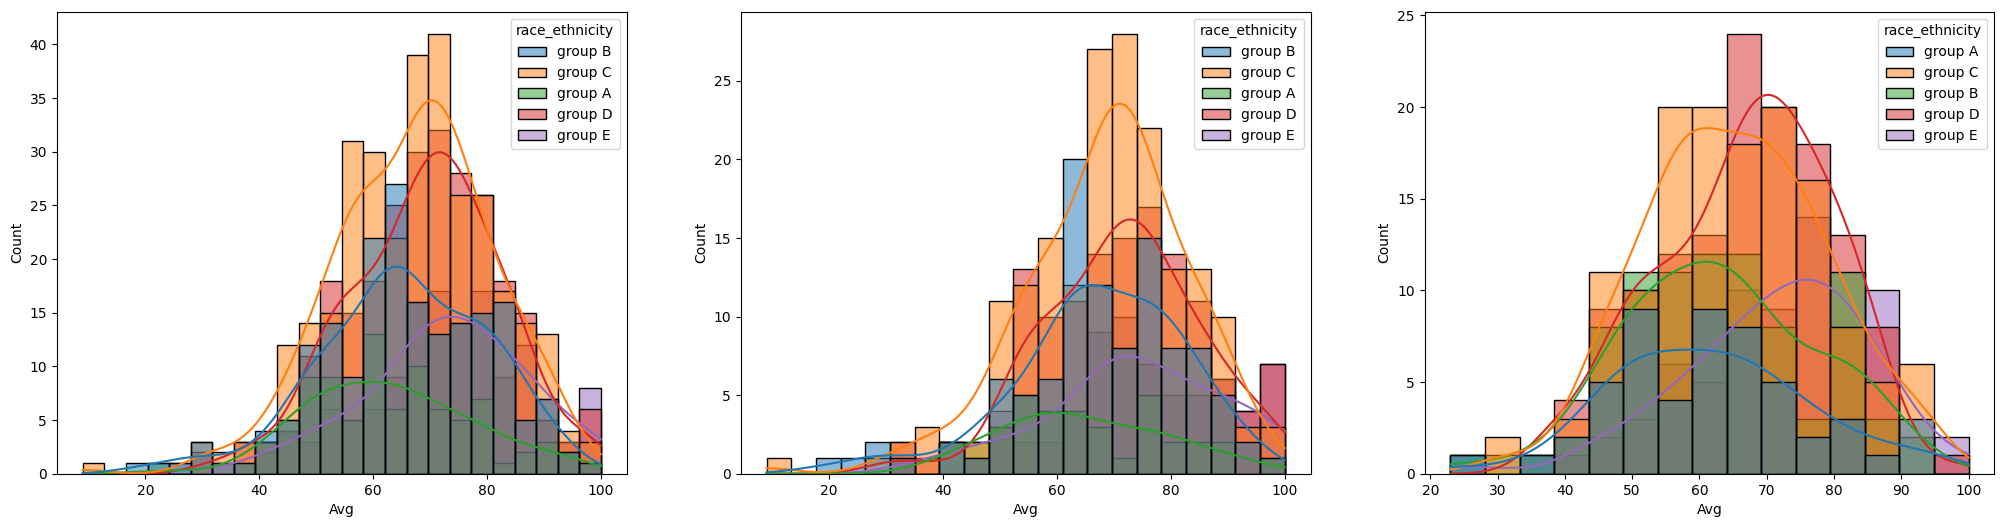

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='Avg',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='Avg',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='Avg',kde=True,hue='race_ethnicity')
plt.show()

Insights -
1. Students of group A and group B tends to perform poorly in exam.
2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

Maximumum score of students in all three subjects

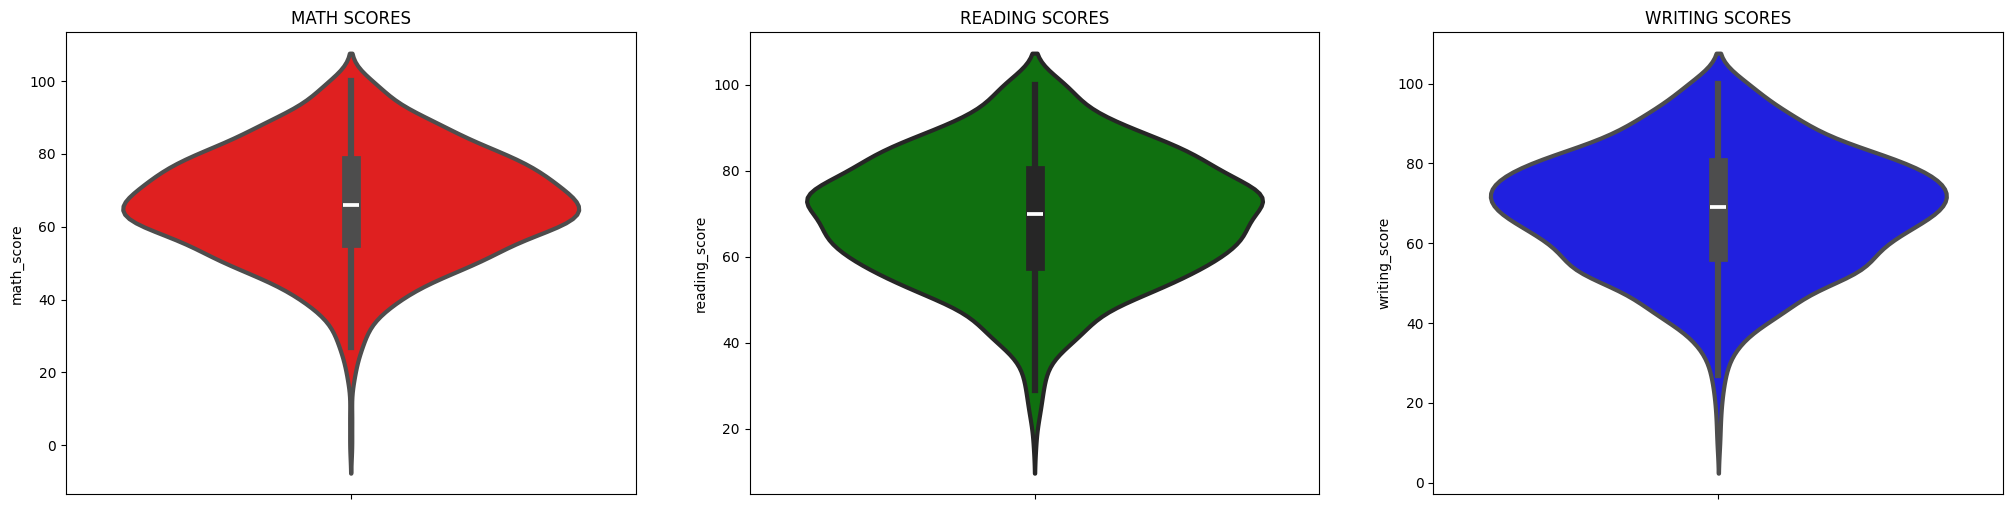

In [54]:
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights -
1. From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

Multivariate analysis using pieplot

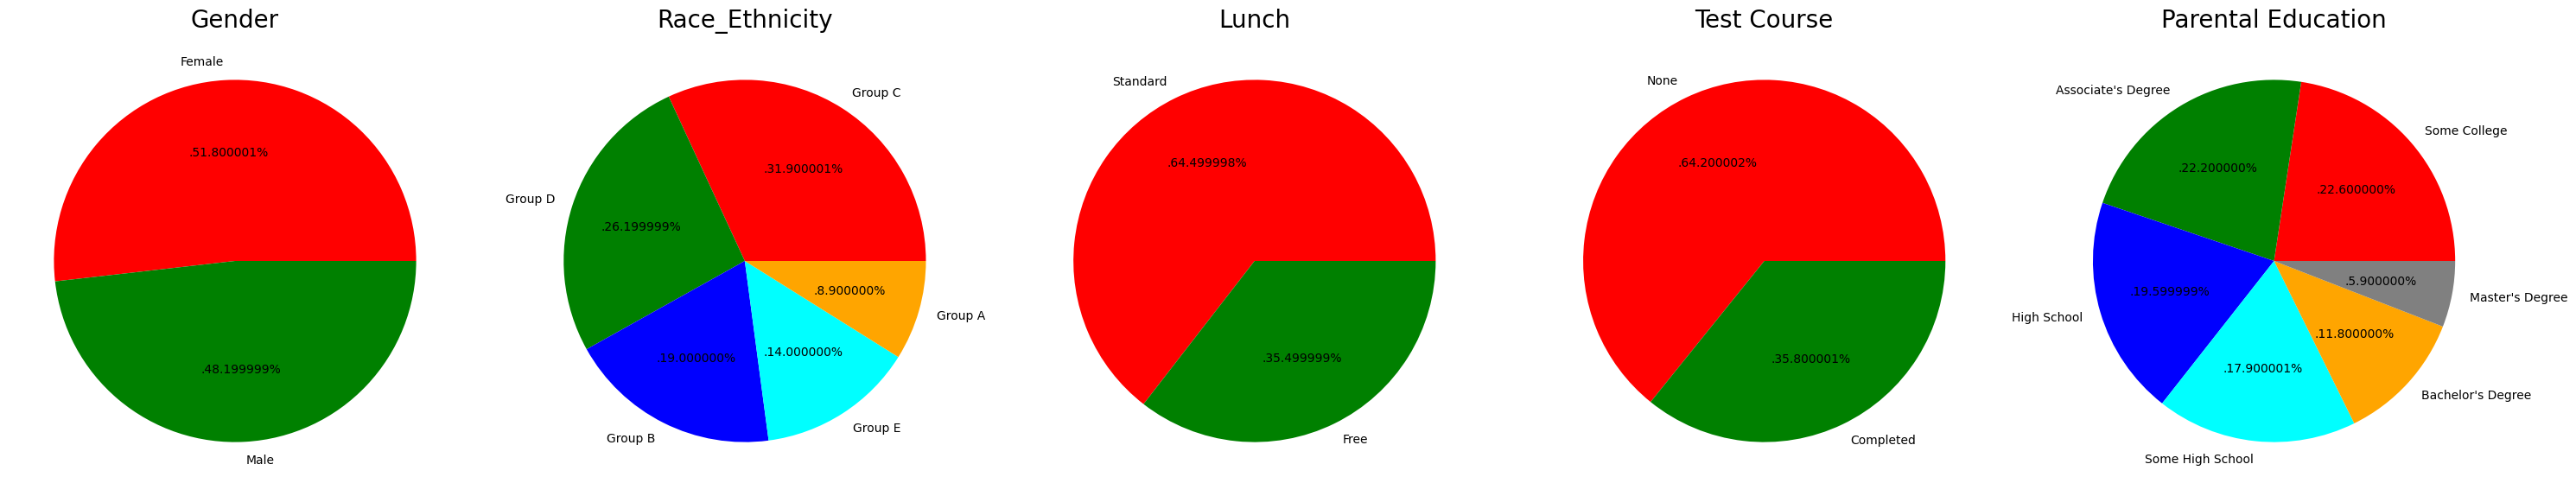

In [56]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights -
1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise Visualization

How is gender distribution?

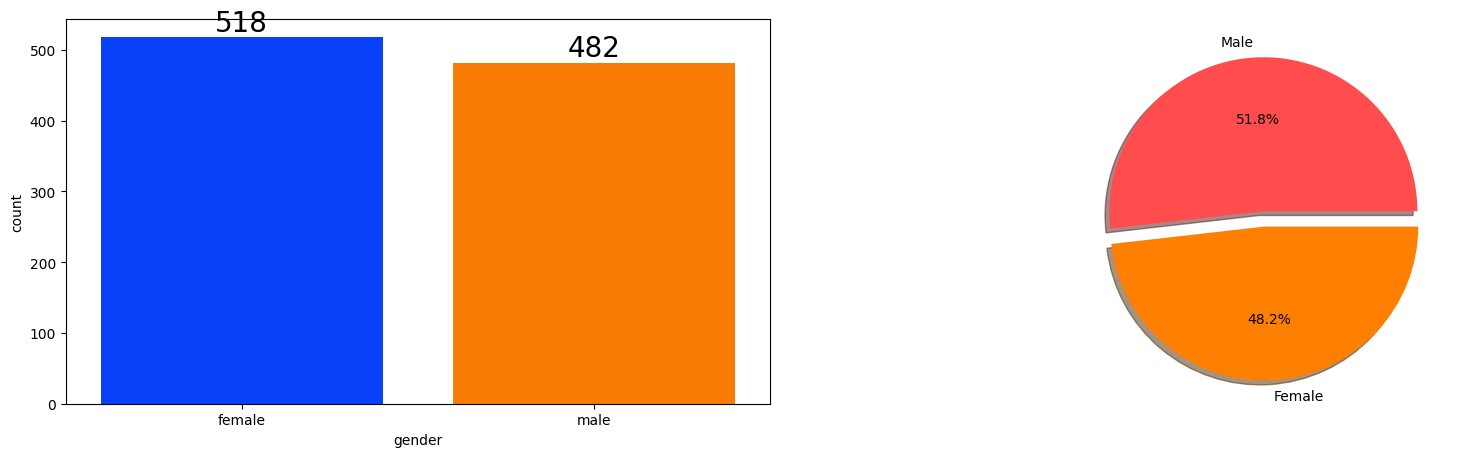

In [60]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights -
1. Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [62]:
df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total', 'Avg'],
      dtype='object')

In [70]:
gender_group = df.groupby('gender').mean(numeric_only=True)


In [71]:
gender_group

,math_score,reading_score,writing_score,total,Avg
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


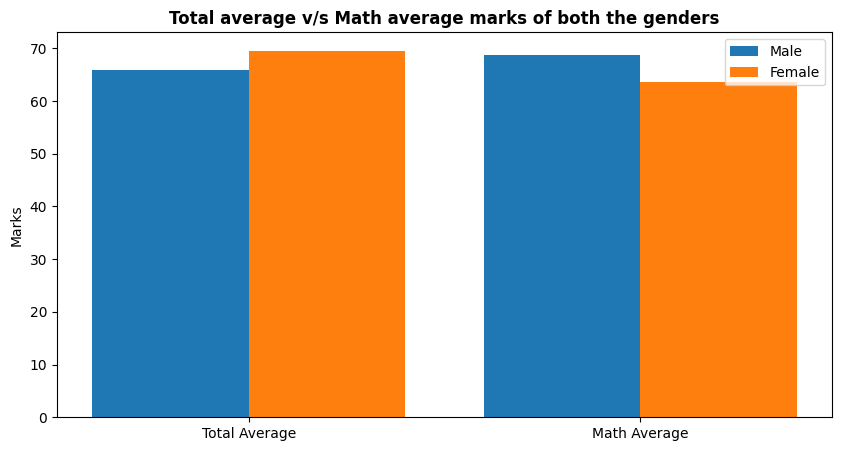

In [73]:
plt.figure(figsize=(10, 5
                    ))

X = ['Total Average','Math Average']


female_scores = [gender_group['Avg'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Avg'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights -
1. On an average females have a better overall score than men.
2. whereas males have scored higher in Maths

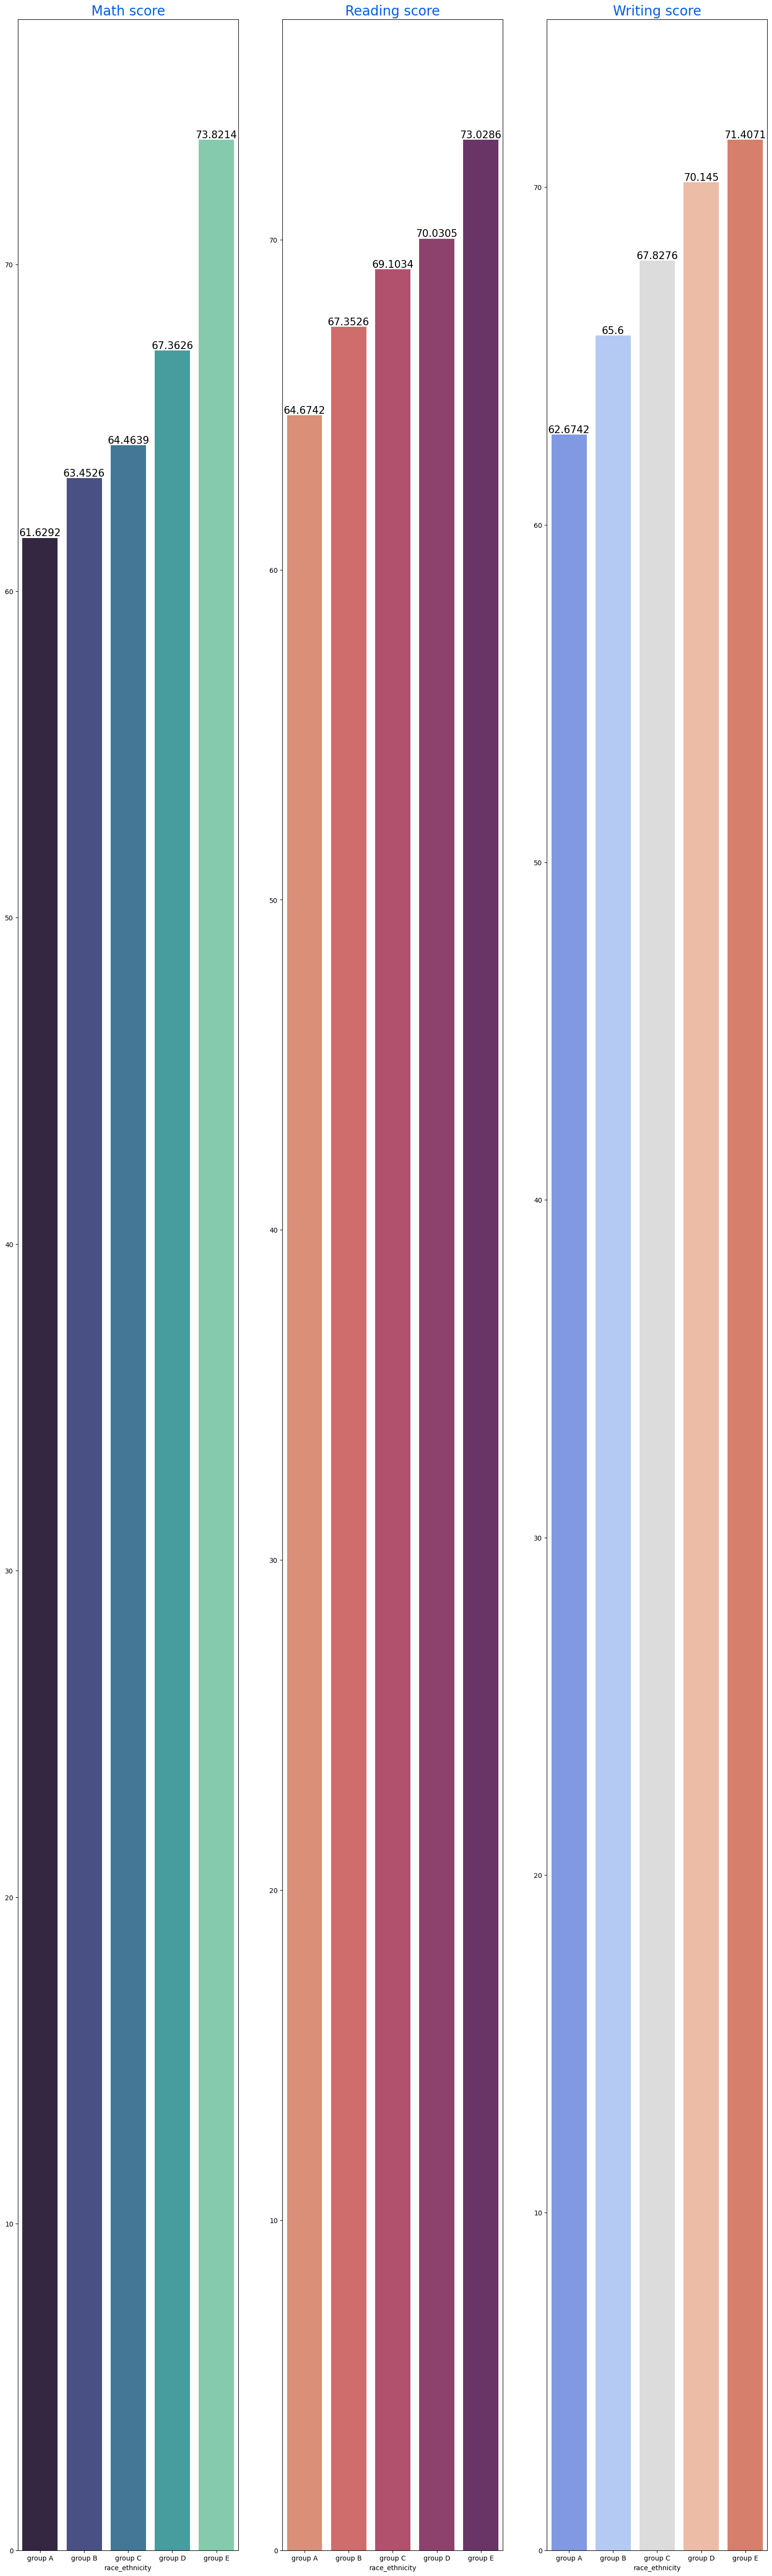

In [76]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,68))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights -
1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks.
3. Students from a lower Socioeconomic status have a lower avg in all course subjects

Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing_score'>

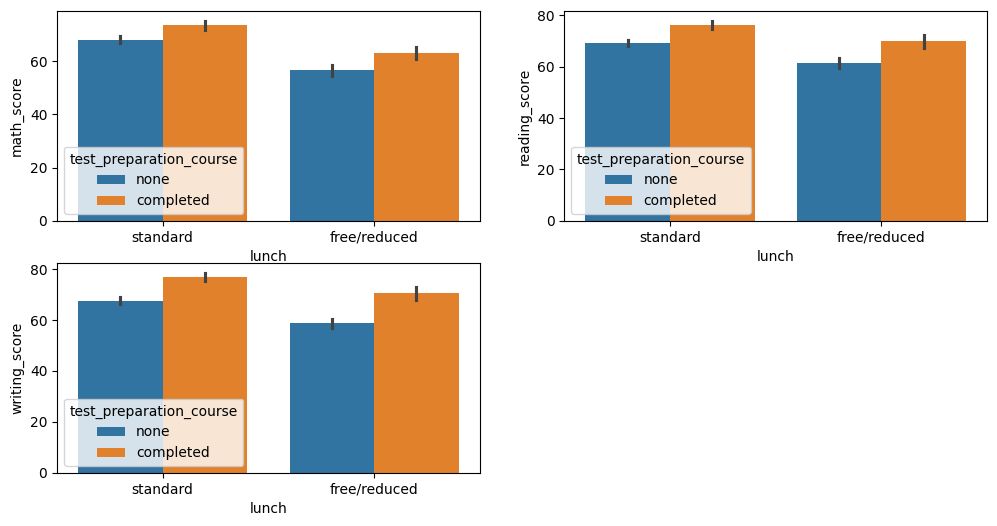

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights -
1. Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

Checking outlieres

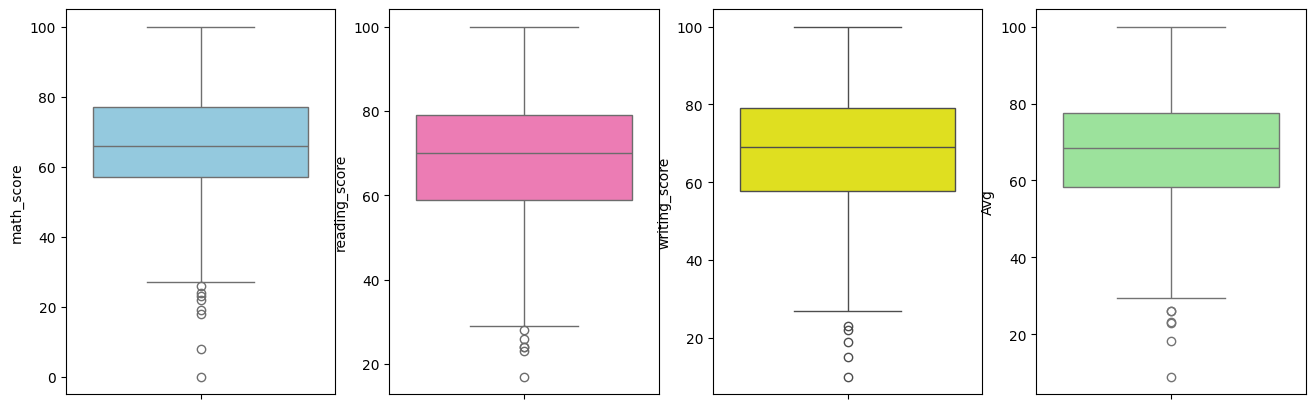

In [78]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Avg'],color='lightgreen')
plt.show()

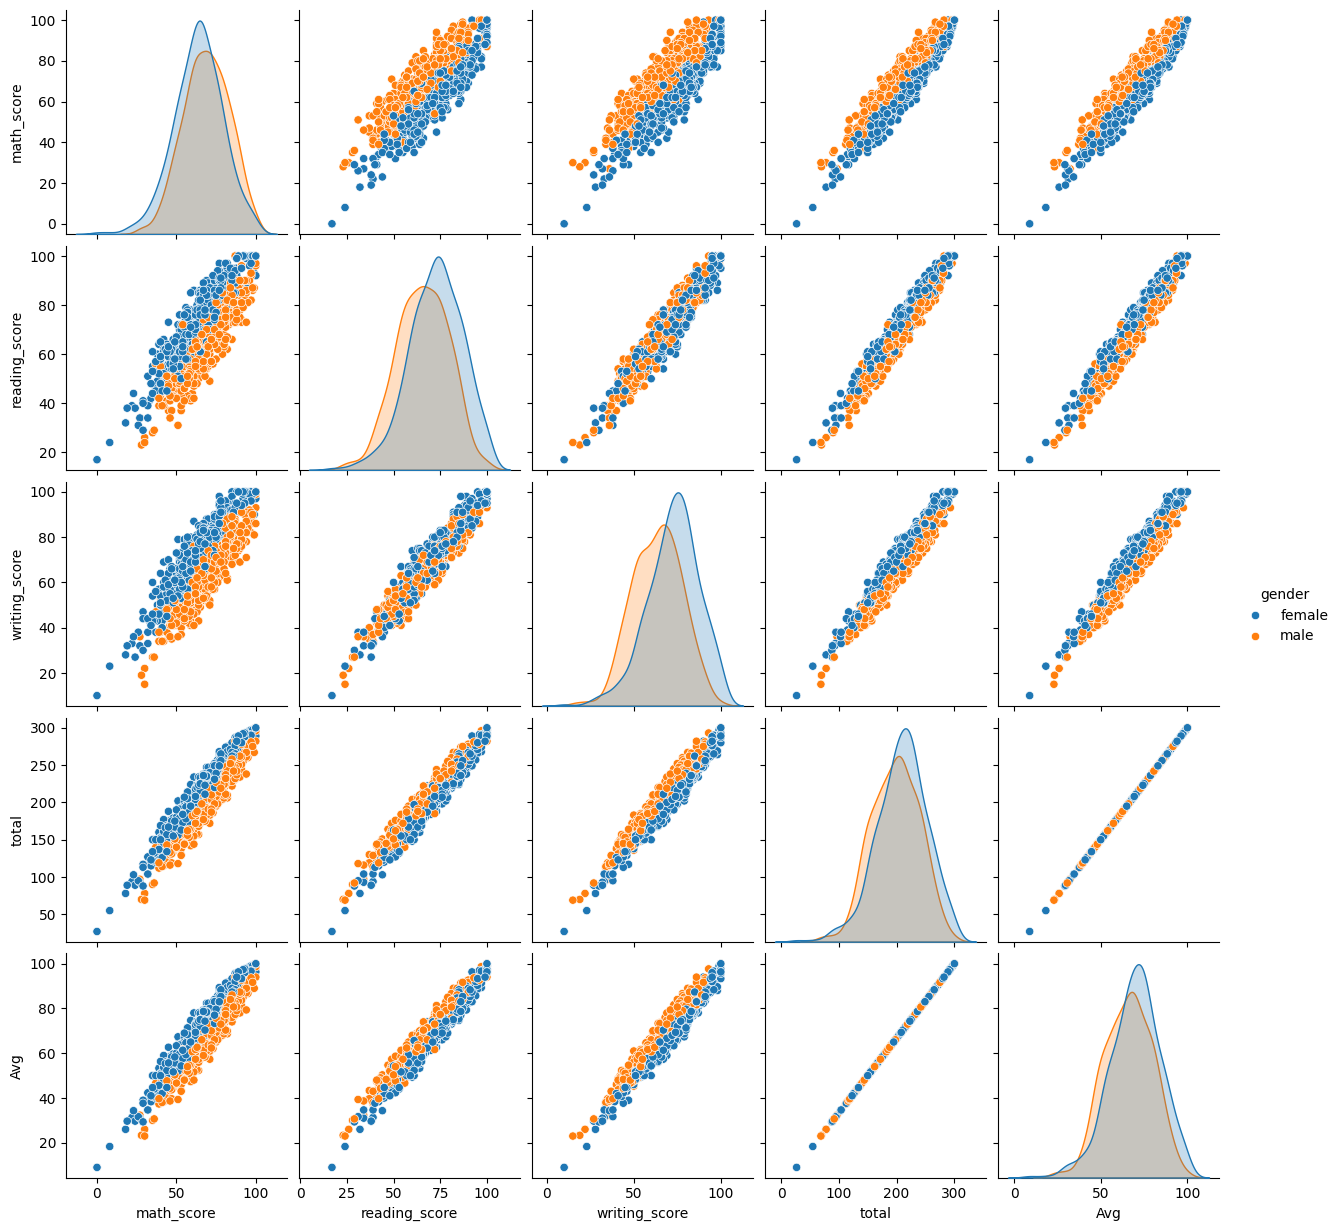

In [79]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights -
1. From the above plot it is clear that all the scores increase linearly with each other.

Conclusions -
1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial